In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from scipy.misc import imread
import codecs
from IPython.display import HTML
%matplotlib inline

In [101]:
df0 = pd.read_csv('/Users/mariavarga/Downloads/title.basics.tsv',sep='\t')

In [4]:
len(df)

5304237

In [10]:
df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,\N,1,"Comedy,Short"


In [14]:
df.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult             int64
startYear         float64
endYear            object
runtimeMinutes     object
genres             object
dtype: object

In [8]:
#df['startYear'].astype(str).astype(int)
df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')

In [24]:
df_movies = df[(df['startYear'] > 2000) & (df['startYear'] < 2019) &  (df['titleType']=='movie')]

In [25]:
df_movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34822,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,\N,118,"Comedy,Fantasy,Romance"
65549,tt0066853,movie,Na Boca da Noite,Na Boca da Noite,0,2016.0,\N,68,Drama
67703,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,\N,122,"Comedy,Drama"
86847,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,\N,100,"Comedy,Horror,Sci-Fi"
92821,tt0094859,movie,Chief Zabu,Chief Zabu,0,2016.0,\N,74,Comedy


In [28]:
count_movies = df_movies.groupby(['startYear']).size().reset_index(name='counts')

In [33]:
count_movies.rename(columns={'startYear':'Year', 'counts':'Counts' }, inplace=True)

In [37]:
count_movies['Year'] = count_movies['Year'].astype('int')

In [77]:
count_movies

,Year,Counts
0,2001,5181
1,2002,5375
2,2003,5453
3,2004,6052
4,2005,6872
5,2006,7344
6,2007,8021
7,2008,9439
8,2009,11075
9,2010,11915


In [73]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(10,5)})

In [75]:
sns.set_context("poster", font_scale=0.85)

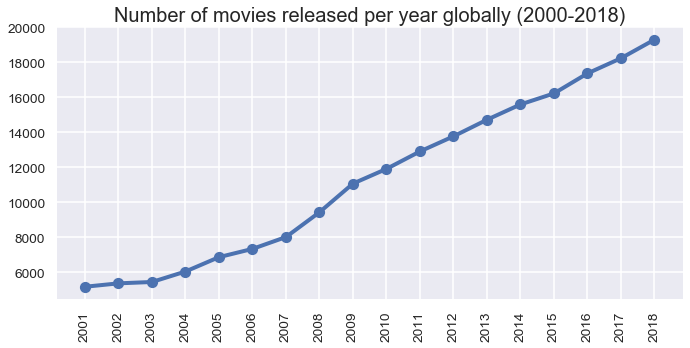

<Figure size 720x360 with 0 Axes>

In [103]:
plt.plot( 'Year', 'Counts', data=count_movies, marker='o',linewidth=4)
plt.xticks(count_movies['Year'],count_movies['Year'],rotation=90)
plt.title('Number of movies released per year globally (2000-2018)',size=20)
plt.show()
plt.savefig('Movies_per_year.png')

# Linear regression

In [78]:
from sklearn.linear_model import LinearRegression

In [84]:
X = np.array(count_movies['Year']).reshape(-1, 1)
y = np.array(count_movies['Counts']).reshape(-1, 1)

In [86]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
lm.intercept_ , lm.coef_

(array([-1792871.44582043]), array([[897.86171311]]))

In [89]:
y.shape

(18, 1)

In [90]:
X_test = np.array([2019,2020]).reshape(-1, 1)

In [91]:
lm.predict(X_test)

array([[19911.35294118],
       [20809.21465428]])

In [92]:
df = pd.read_csv('/Users/mariavarga/Downloads/title.akas.tsv',sep='\t')

In [93]:
df.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [95]:
count_country = df.groupby(['region']).size().reset_index(name='counts')

In [100]:
count_country[count_country['region'] == 'US']

,region,counts
213,US,899846


In [98]:
new_df = pd.merge(df0, df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])

,region,counts
0,AD,28
1,AE,899
2,AF,165
3,AG,16
4,AI,1
5,AL,1493
6,AM,439
7,AN,24
8,AO,69
9,AQ,5


# Movies by genres

In [190]:
pd.options.display.float_format = '{:.0f}'.format

In [47]:
movies=pd.read_csv('input/tmdb_5000_movies.csv')
mov=pd.read_csv('input/tmdb_5000_credits.csv')

In [48]:
# changing the genres column from json to string
movies['genres']=movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))# the key 'name' contains the name of the genre
    movies.loc[index,'genres']=str(list1)
    
# changing the keywords column from json to string
movies['keywords']=movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords']=str(list1)
    
## changing the production_companies column from json to string
movies['production_companies']=movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies']=str(list1)
    
# changing the production_countries column from json to string    
movies['production_countries']=movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_countries']=str(list1)
    
# changing the cast column from json to string
mov['cast']=mov['cast'].apply(json.loads)
for index,i in zip(mov.index,mov['cast']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    mov.loc[index,'cast']=str(list1)

# changing the crew column from json to string    
mov['crew']=mov['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
mov['crew']=mov['crew'].apply(director)
mov.rename(columns={'crew':'director'},inplace=True)

In [49]:
movies=movies.merge(mov,left_on='id',right_on='movie_id',how='left')

In [50]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


In [100]:
genre_labels = []
for genres in movies['genres']:
     for genre in genres:
            genre_labels.append(genre)
            
genre_labels = list(set(genre_labels))
genre_labels.remove('')

In [101]:
genre_labels

['Fantasy',
 'Romance',
 'Music',
 'Crime',
 'Mystery',
 'TVMovie',
 'Western',
 'History',
 'Thriller',
 'Family',
 'Foreign',
 'Adventure',
 'Action',
 'War',
 'Drama',
 'Horror',
 'Animation',
 'ScienceFiction',
 'Documentary',
 'Comedy']

In [116]:
print('There are {} movies on the database'.format(len(movies)))
print('Only {} has budget information'.format(len(movies[movies['budget']>100])))

There are 4803 movies on the database
Only 3742 has budget information


In [117]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'director', '', 'Fantasy',
       'Romance', 'Music', 'Crime', 'Mystery', 'TVMovie', 'Western', 'History',
       'Thriller', 'Family', 'Foreign', 'Adventure', 'Action', 'War', 'Drama',
       'Horror', 'Animation', 'ScienceFiction', 'Documentary', 'Comedy'],
      dtype='object')

In [119]:
movies_bud = movies[movies['budget']>100][['budget','genres','original_title','release_date']]

In [120]:
for genre in genre_labels:
    movies_bud[genre] = movies_bud['genres'].apply(lambda x:1 if genre in x else 0)

In [122]:
movies_bud['year'] = pd.to_datetime(movies_bud['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x!= np.nan else np.nan)

In [152]:
movies_bud.head()

,budget,genres,original_title,release_date,Fantasy,Romance,Music,Crime,Mystery,TVMovie,...,Adventure,Action,War,Drama,Horror,Animation,ScienceFiction,Documentary,Comedy,year
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",Avatar,2009-12-10,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,2009
1,300000000,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,2007-05-19,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,2007
2,245000000,"[Action, Adventure, Crime]",Spectre,2015-10-26,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,2015
3,250000000,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,2012-07-16,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,2012
4,260000000,"[Action, Adventure, ScienceFiction]",John Carter,2012-03-07,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,2012


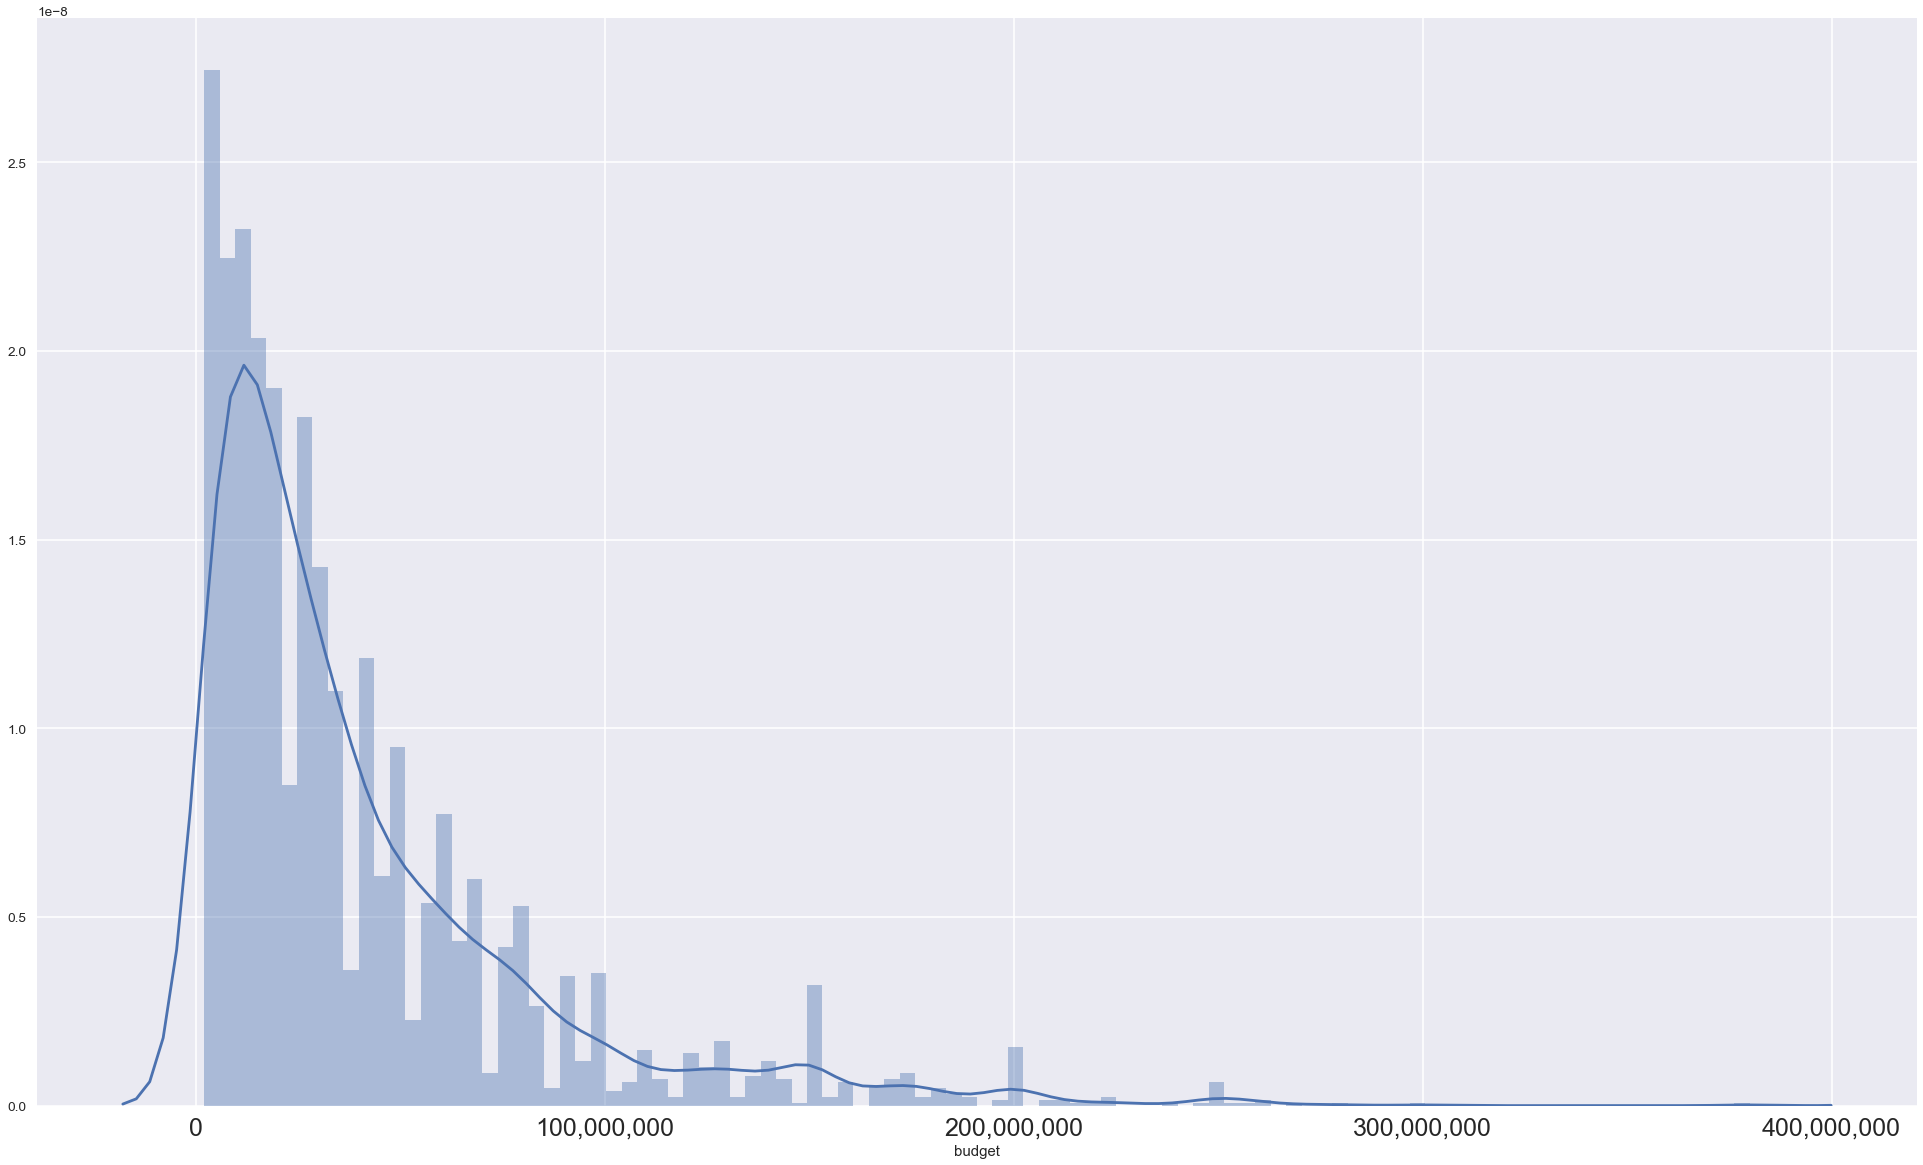

In [198]:
f, (ax1) = plt.subplots(1, 1, figsize=(30, 20), sharex=True)# Generate some sequential data
sns.distplot(movies_bud[(movies_bud['budget']>2000000)]['budget'].dropna(), bins=100,ax=ax1)
#ax1.set_xticklabels(mean_per_genre[0],rotation=90,fontsize=25)
ax1.set_xticklabels(['{:,}'.format(int(x)) for x in ax1.get_xticks().tolist()],fontsize=25)
#ax1.set_yticklabels(mean_per_genre['mean_budget'],fontsize=25)
plt.show()

In [153]:
def get_stats(gr):
    return {'min':gr.min(),'max':gr.max(),'count': gr.count(),'mean':gr.mean()}

In [154]:
year = movies_bud['budget'].groupby(movies_bud['year']).apply(get_stats).unstack()
year.reset_index(level=0, inplace=True)

In [155]:
year['year']=year['year'].astype('int')

In [157]:
year[year['year']>1986][:5]

,year,count,max,mean,min
58,1987,23.0,55000000.0,1.634348e+07,1000000.0
59,1988,24.0,63000000.0,1.347500e+07,1300000.0
60,1989,29.0,70000000.0,1.931931e+07,160000.0
61,1990,25.0,70000000.0,2.956900e+07,225000.0
62,1991,26.0,100000000.0,2.780769e+07,500000.0


In [158]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(17.7,28.27)})

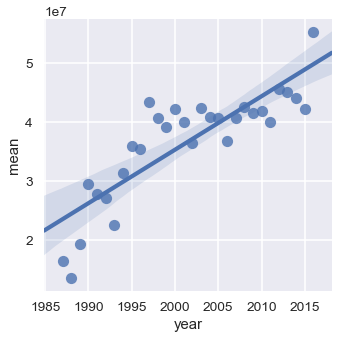

In [191]:
sns.set_context("poster", font_scale=0.85)
sns.lmplot(x='year', y='mean', data=year[year['year']>1986])
#plt.figure(figsize=(25,20))

In [160]:
year['year'].max()

2016

In [161]:
year[year['year'] == 2016]

,year,count,max,mean,min
87,2016,86.0,250000000.0,5.526907e+07,750000.0


In [162]:
5.526907e+07

55269070.0

In [183]:
mean_per_genre = pd.DataFrame(genre_labels)

In [181]:
mean = []
count = []

In [182]:
for genre in genre_labels:
    mean.append(movies_bud[movies_bud[genre]==1]['budget'].mean())
    count.append(movies_bud[movies_bud[genre]==1]['budget'].count())


In [185]:
mean_per_genre['mean'] = mean

In [186]:
mean_per_genre['count'] = count

In [194]:
mean_per_genre

,0,mean,count
16,Animation,75135367,207
11,Adventure,73079805,717
0,Fantasy,71484606,377
9,Family,63616405,409
12,Action,58796643,1011
17,ScienceFiction,58663995,473
13,War,38783770,131
8,Thriller,38098686,1069
4,Mystery,36023843,297
7,History,35487849,166


In [193]:
mean_per_genre.sort_values(['mean'], ascending=False, inplace=True)

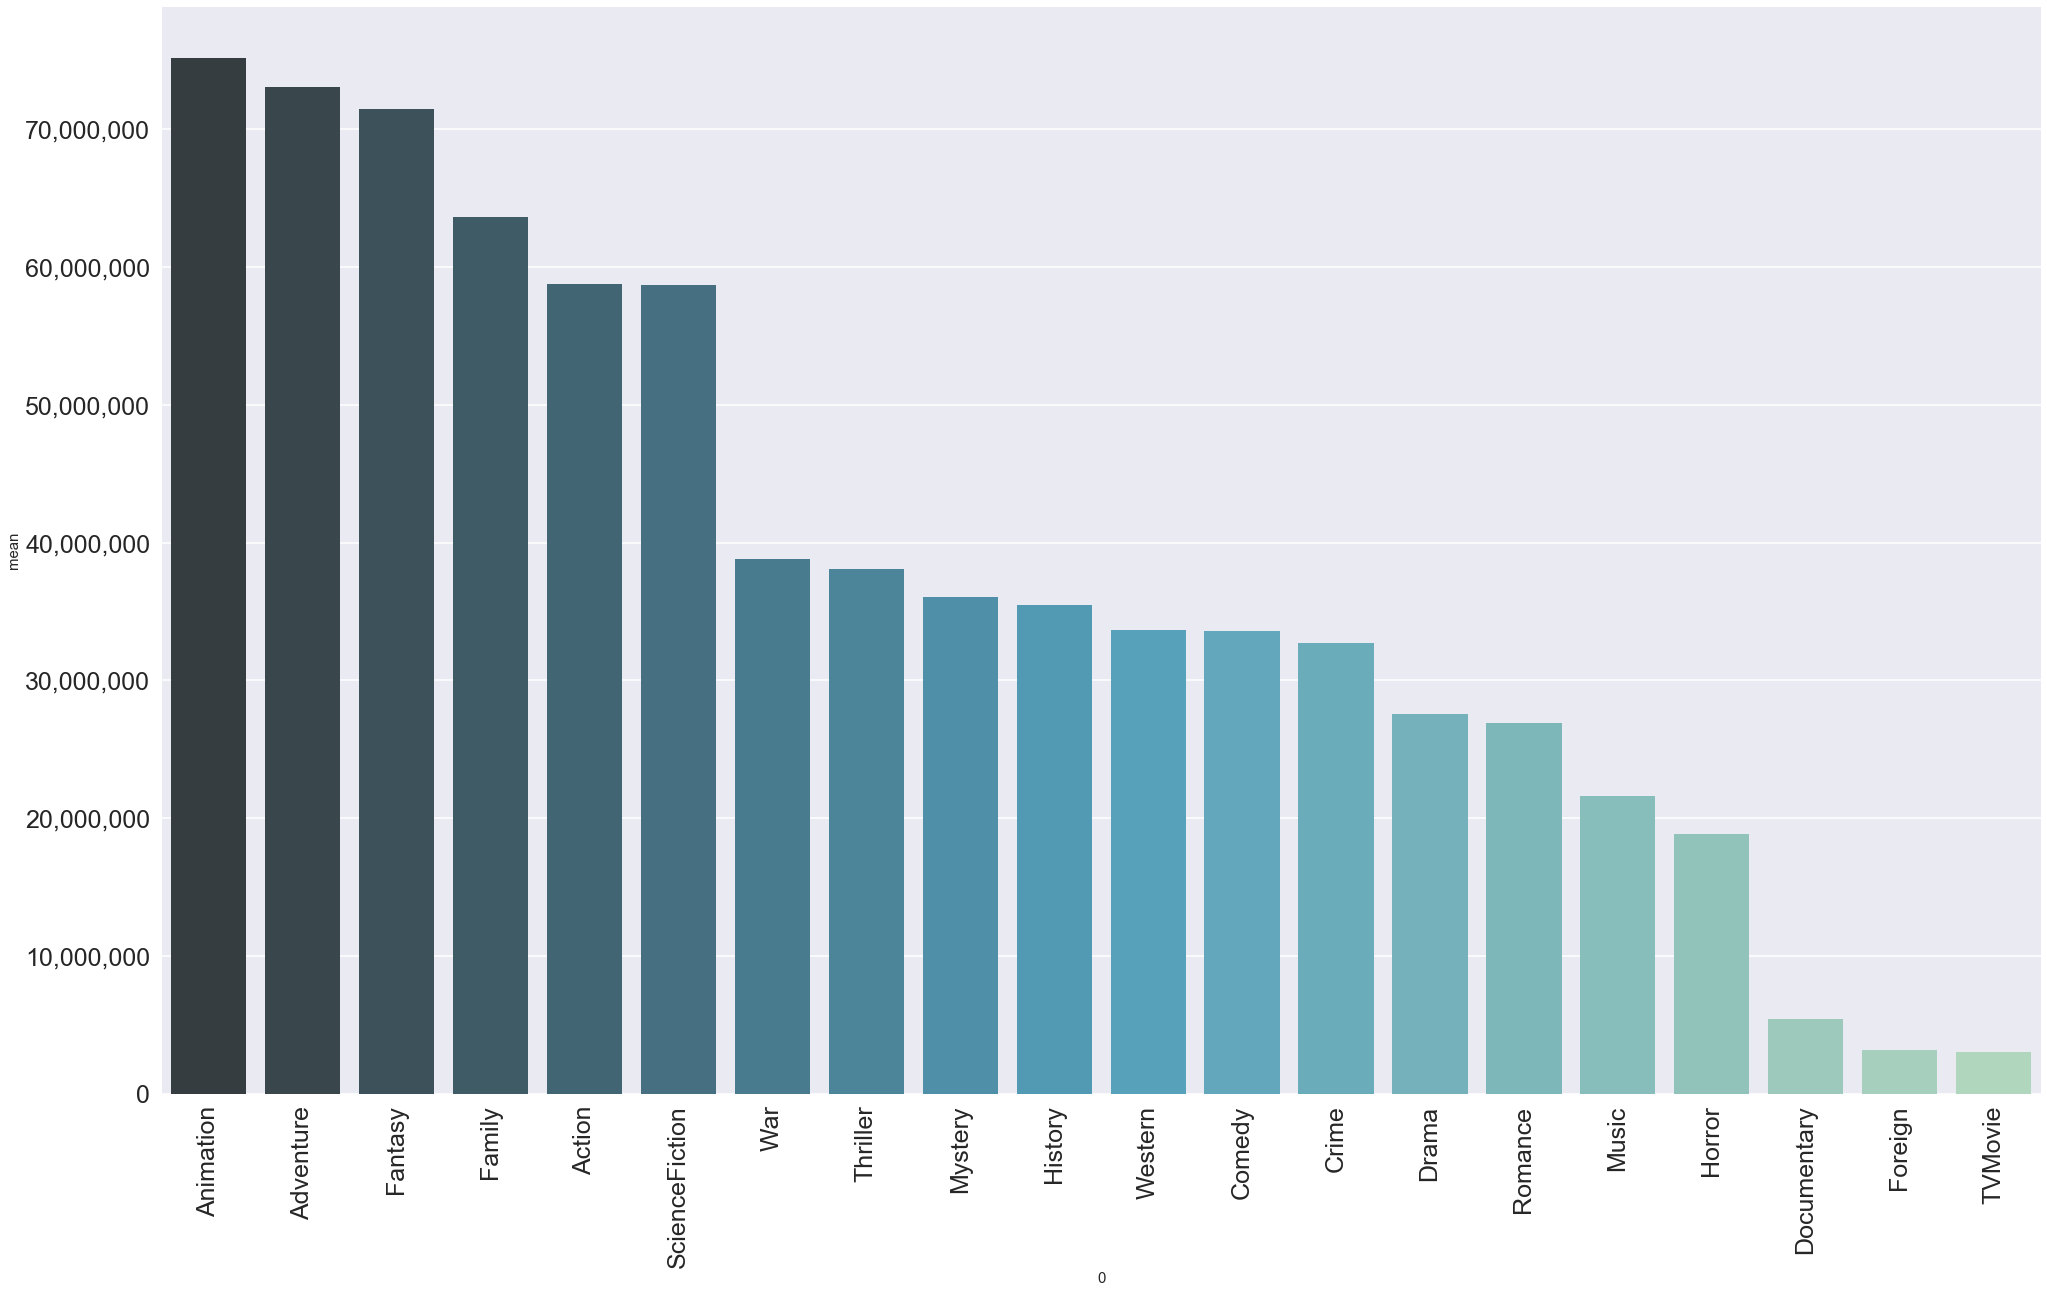

In [196]:
f, (ax1) = plt.subplots(1, 1, figsize=(30, 20), sharex=True)# Generate some sequential data
sns.barplot(mean_per_genre[0], mean_per_genre['mean'], palette="GnBu_d", ax=ax1)
ax1.set_xticklabels(mean_per_genre[0],rotation=90,fontsize=25)
ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()],fontsize=25)
#ax1.set_yticklabels(mean_per_genre['mean_budget'],fontsize=25)
plt.show()

In [200]:
high_budget = ['Animation','Adventure','Fantasy','Family','Action','ScienceFiction']
med_budget = ['War', 'Thriller','Mystery','History','Western','Comedy','Crime']
low_budget = ['Drama','Romance','Music','Horror','Documentary','Foreign','TVMovie']

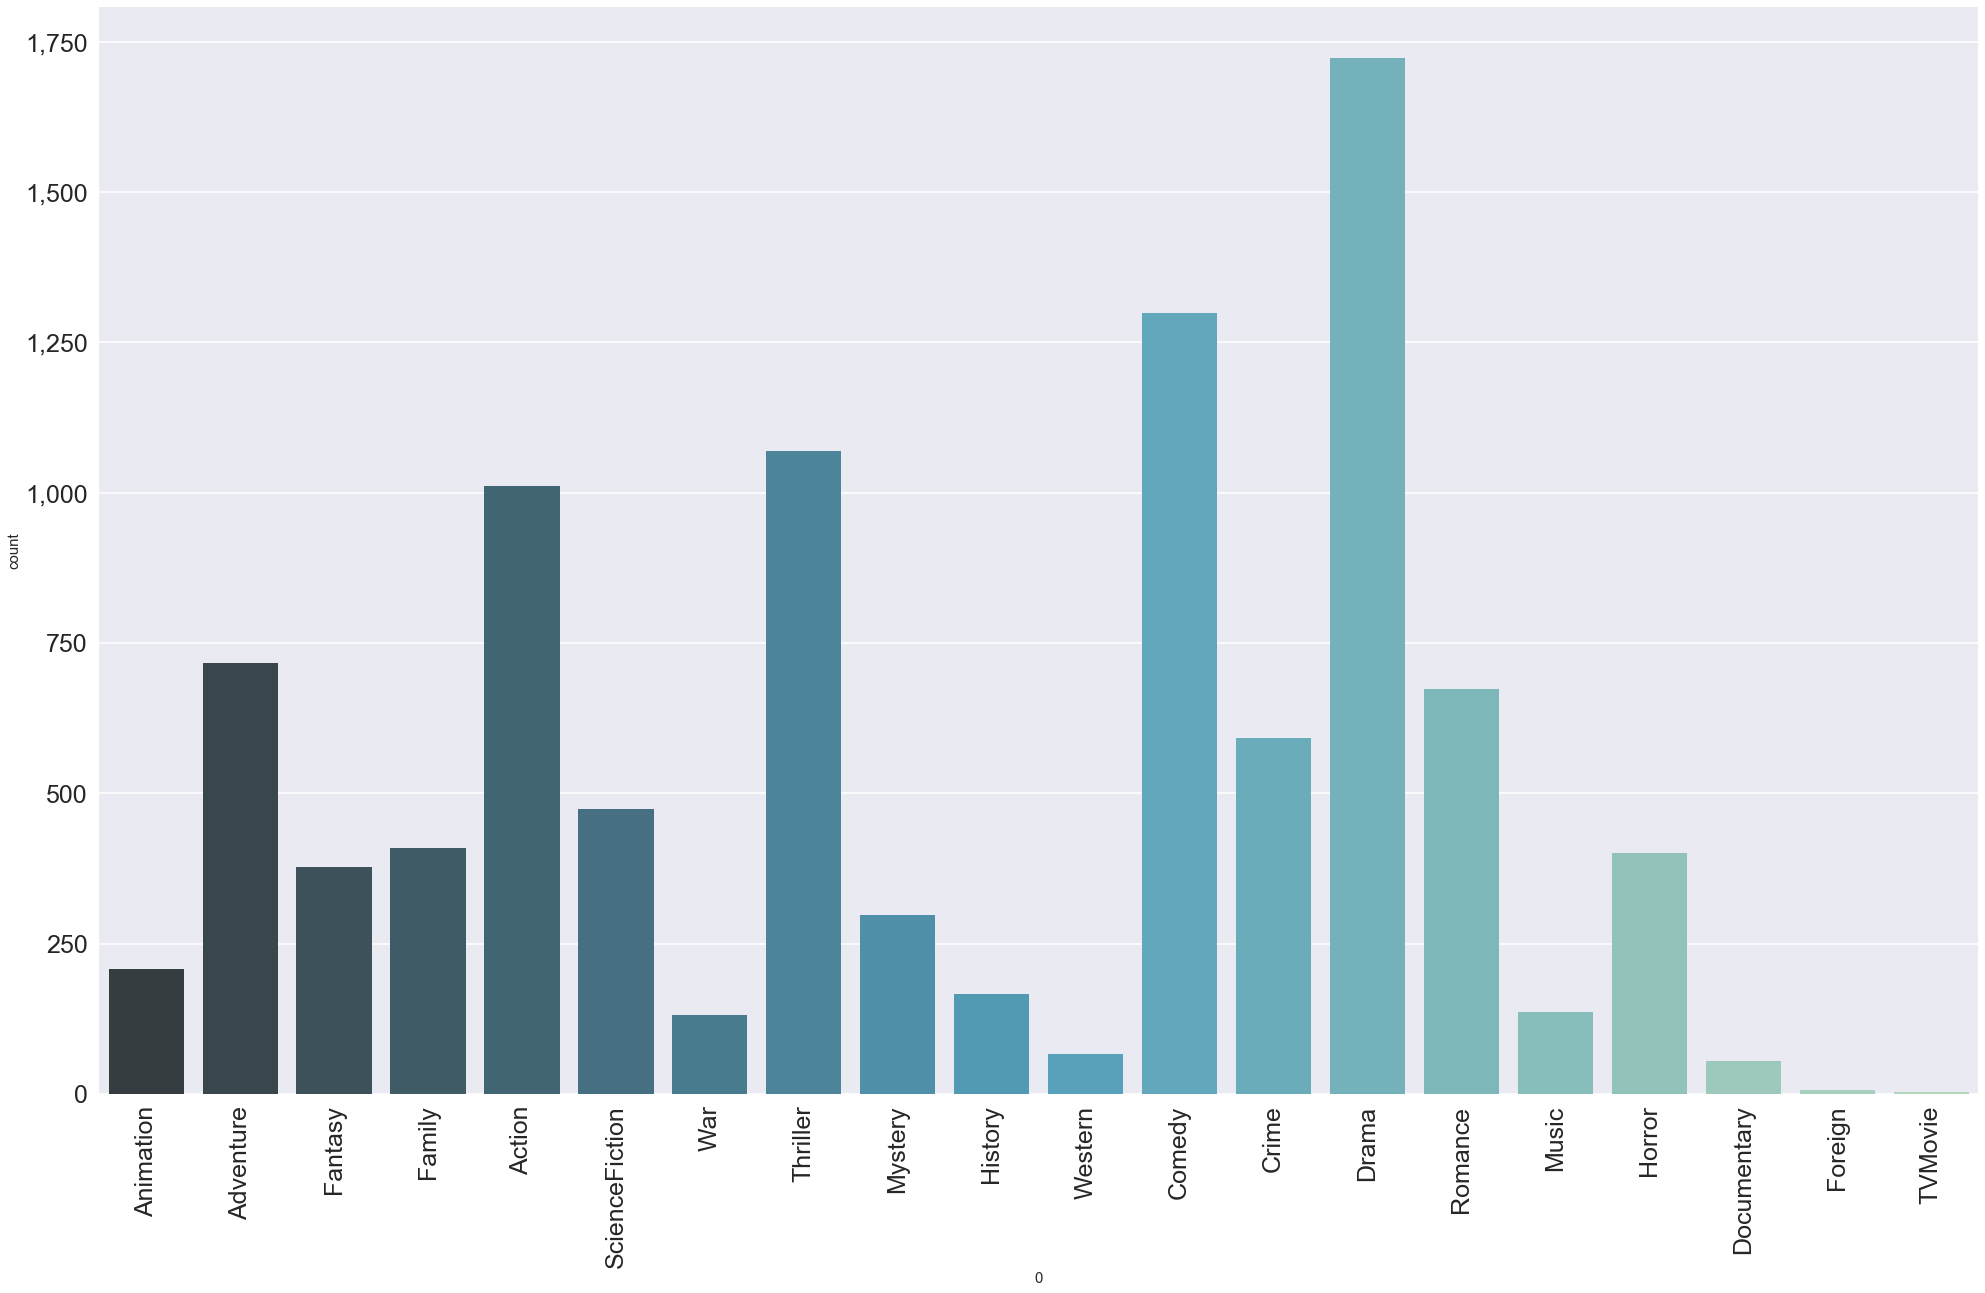

In [197]:
f, (ax1) = plt.subplots(1, 1, figsize=(30, 20), sharex=True)# Generate some sequential data
sns.barplot(mean_per_genre[0], mean_per_genre['count'], palette="GnBu_d", ax=ax1)
ax1.set_xticklabels(mean_per_genre[0],rotation=90,fontsize=25)
ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()],fontsize=25)
#ax1.set_yticklabels(mean_per_genre['mean_budget'],fontsize=25)
plt.show()